<a href="https://colab.research.google.com/github/kashishrathod12/Titanic-ML-Pipeline/blob/main/Titanic_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
x = np.arange(6).reshape(2, 3)
print(x)
print(x.T)
print()
y = np.ravel(x)
print(y)
print()
z = np.hstack([x, x])
print(z)


[[0 1 2]
 [3 4 5]]
[[0 3]
 [1 4]
 [2 5]]

[0 1 2 3 4 5]

[[0 1 2 0 1 2]
 [3 4 5 3 4 5]]


In [9]:
a = np.array([1, 2, 3, 4, 5])
print(np.sum(a))
print(np.mean(a))
print(np.median(a))
print(np.std(a))
print(np.argmax(a))

15
3.0
3.0
1.4142135623730951
4


In [10]:
A = np.array([[1, 2], [3, 4]])
B = np.array([[2, 0], [1, 2]])
print(np.dot(A, B))
print(np.linalg.det(A))
print(np.linalg.inv(A))

[[ 4  4]
 [10  8]]
-2.0000000000000004
[[-2.   1. ]
 [ 1.5 -0.5]]


In [11]:
import numpy as np
import pandas as pd
df = pd.read_csv('/content/train.csv')

In [12]:
def get_column_info(dataframe):
    return {
        'object_cols' : dataframe.select_dtypes(include=['object']).columns,
        'numeric_cols' : dataframe.select_dtypes(include=['number']).columns,
    }
column_info = get_column_info(df)

In [13]:
missing_stats = {
    'missing_values': df.isnull().sum(),
    'total_missing' : df.isnull().sum().sum()
}
print("Total missing", missing_stats['total_missing'])

Total missing 866


In [14]:
df[column_info['numeric_cols']] = df[column_info['numeric_cols']].apply(lambda x:x.fillna(x.mean()))
df[column_info['object_cols']] = df[column_info['object_cols']].apply(lambda x:x.fillna(x.mode()[0]))
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [15]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [17]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

In [19]:
def column_info(dataframe):
  return {'object_cols':dataframe.select_dtypes(include=['object']).columns,
          'numeric_cols':dataframe.select_dtypes(include=['number']).columns}
cols=column_info(df)
print(cols)
print(f'Database contains {len(cols['numeric_cols'])} Numeric columns and {len(cols['object_cols'])} Categorical columns')

{'object_cols': Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object'), 'numeric_cols': Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')}
Database contains 7 Numeric columns and 5 Categorical columns


In [20]:
duplicate_cells=df.duplicated().sum()
print(duplicate_cells)
total_missing = df.isnull().sum().sum()
print("Total missing:",total_missing)
total_duplicates = df.duplicated().sum()
print("Total duplicates:",total_duplicates)

0
Total missing: 0
Total duplicates: 0


In [21]:
print("Number of missing cells=",df.isnull().sum().sum())
df = df.drop_duplicates()
if "PassengerId" in df.columns:
    df = df.drop(columns="PassengerId")
column_info = get_column_info(df)
df[column_info['object_cols']] = df[column_info['object_cols']].apply(lambda x:x.fillna(x.mode()[0]))
df[column_info['numeric_cols']] = df[column_info['numeric_cols']].apply(lambda x:x.fillna(x.mean()).reset_index(drop=True))
df

Number of missing cells= 0


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,B96 B98,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C148,C


In [22]:
def InterQR(dataframe):
    results={}
    for col in dataframe[column_info['numeric_cols']]:
        Q1 = dataframe[col].quantile(0.25)
        Q3 = dataframe[col].quantile(0.75)
        IQR = Q3 - Q1
        upper = Q3 + 1.5 * IQR
        lower = Q1 - 1.5 * IQR
        results[col]={
            'Q1': Q1,
            'Q3' : Q3,
            'IQR' : IQR,
            'upper' : upper,
            'lower' : lower
        }
    return results
InterQR(df)

{'Survived': {'Q1': np.float64(0.0),
  'Q3': np.float64(1.0),
  'IQR': np.float64(1.0),
  'upper': np.float64(2.5),
  'lower': np.float64(-1.5)},
 'Pclass': {'Q1': np.float64(2.0),
  'Q3': np.float64(3.0),
  'IQR': np.float64(1.0),
  'upper': np.float64(4.5),
  'lower': np.float64(0.5)},
 'Age': {'Q1': np.float64(22.0),
  'Q3': np.float64(35.0),
  'IQR': np.float64(13.0),
  'upper': np.float64(54.5),
  'lower': np.float64(2.5)},
 'SibSp': {'Q1': np.float64(0.0),
  'Q3': np.float64(1.0),
  'IQR': np.float64(1.0),
  'upper': np.float64(2.5),
  'lower': np.float64(-1.5)},
 'Parch': {'Q1': np.float64(0.0),
  'Q3': np.float64(0.0),
  'IQR': np.float64(0.0),
  'upper': np.float64(0.0),
  'lower': np.float64(0.0)},
 'Fare': {'Q1': np.float64(7.9104),
  'Q3': np.float64(31.0),
  'IQR': np.float64(23.0896),
  'upper': np.float64(65.6344),
  'lower': np.float64(-26.724)}}

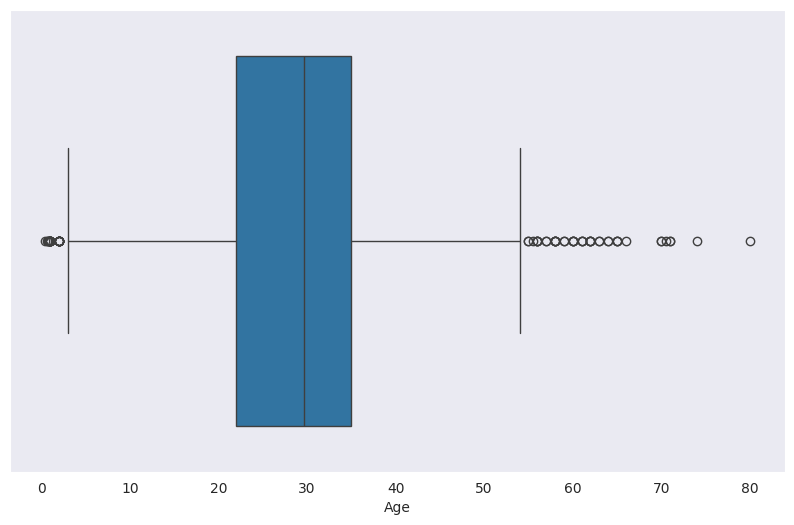

In [23]:
plt.figure(figsize = (10,6))
sns.boxplot(x=df['Age'])
plt.show()

In [24]:
def cap_outliers(df, cols):
    df_capped = df.copy()
    for col in cols:
        Q1 = df_capped[col].quantile(0.25)
        Q3 = df_capped[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR
        df_capped[col] = df_capped[col].clip(lower, upper)
    return df_capped

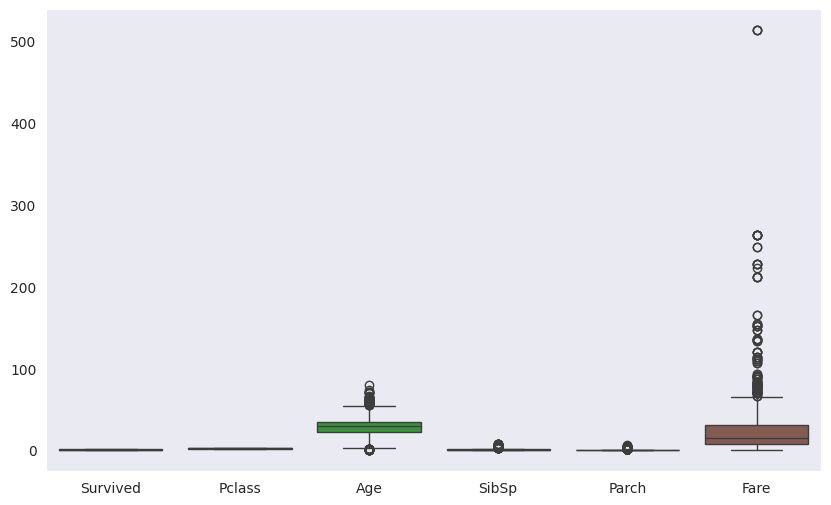

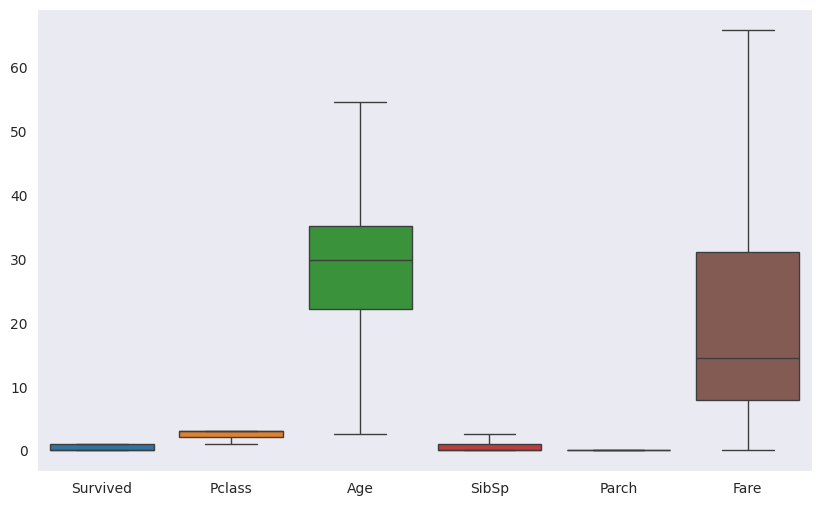

In [25]:
df_capped = cap_outliers(df, column_info['numeric_cols'])
plt.figure(figsize=(10,6))
sns.boxplot(data=df[column_info['numeric_cols']])
plt.show()
plt.figure(figsize=(10,6))
sns.boxplot(data=df_capped[column_info['numeric_cols']])
plt.show()

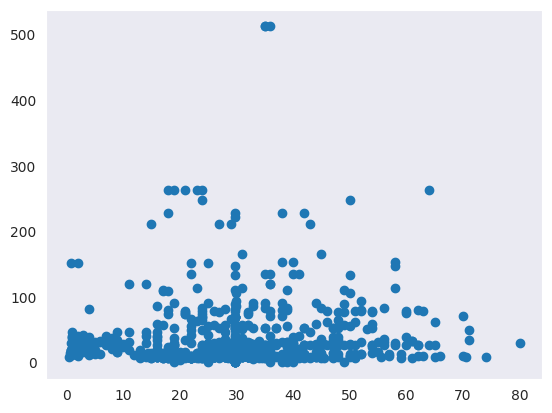

In [26]:
plt.scatter(x='Age',y='Fare',data=df)
plt.xlabel='Age'
plt.ylabel='Fare'
plt.title="Age VS Fare"
plt.show()

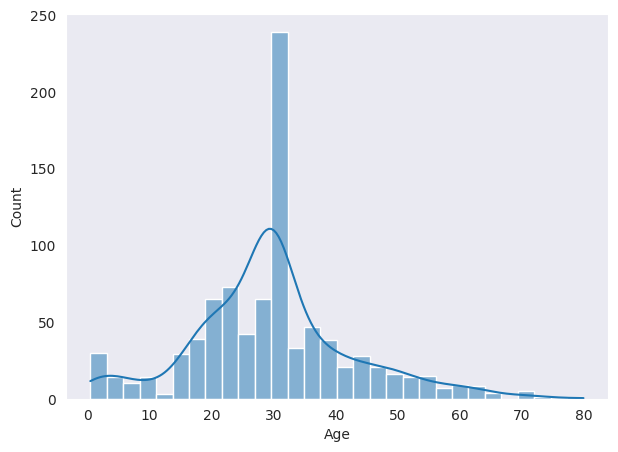

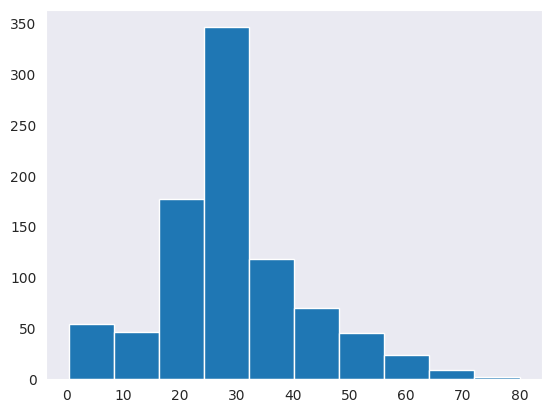

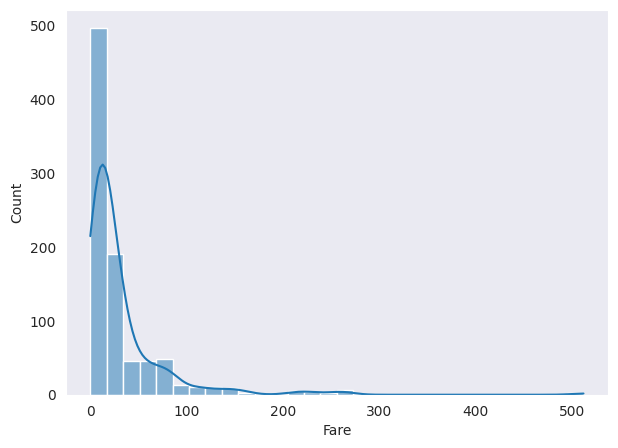

In [27]:
plt.figure(figsize=(7,5))
sns.histplot(df["Age"], bins=30, kde=True)
plt.show()
plt.hist(x=df['Age'])
plt.figure(figsize=(7,5))
sns.histplot(df["Fare"], bins=30, kde=True)
plt.show()


In [28]:
print("Shape :",df.shape)

Shape : (891, 11)


In [29]:
fil = df['Sex'] == 'female'
df.loc[fil]['Embarked'].value_counts()

,count
Embarked,
S,205
C,73
Q,36


In [30]:
df.groupby(['Pclass','Sex']).agg({'Age':['mean','median'],'Fare':'mean'})

Age                   Fare
                    mean     median        mean
Pclass Sex                                     
1      female  34.141405  32.500000  106.125798
       male    39.287717  36.000000   67.226127
2      female  28.748661  28.500000   21.970121
       male    30.653908  29.699118   19.741782
3      female  24.068493  28.000000   16.118810
       male    27.372153  29.699118   12.661633

In [31]:
pd.pivot_table(data=df,index='Pclass',columns='Sex',values='Survived')

Sex,female,male
Pclass,,
1,0.968085,0.368852
2,0.921053,0.157407
3,0.500000,0.135447


In [32]:
pd.crosstab(index=df['Pclass'], columns=df['Survived'], normalize=True, margins=True)

Survived,0,1,All
Pclass,,,
1,0.089787,0.152637,0.242424
2,0.108866,0.097643,0.206510
3,0.417508,0.133558,0.551066
All,0.616162,0.383838,1.000000


In [33]:
df.groupby(['Age']).agg({'Age':'mean','Fare':'median','Survived':'count'})

,Age,Fare,Survived
Age,,,
0.42,0.42,8.5167,1
0.67,0.67,14.5000,1
0.75,0.75,19.2583,2
0.83,0.83,23.8750,2
0.92,0.92,151.5500,1
...,...,...,...
70.00,70.00,40.7500,2
70.50,70.50,7.7500,1
71.00,71.00,42.0792,2


<Axes: xlabel='Survived', ylabel='Age'>

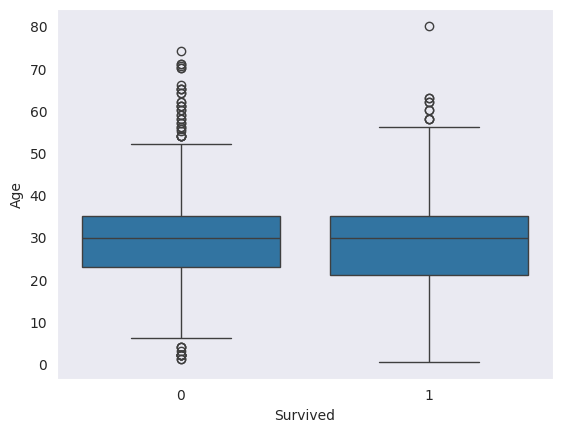

In [34]:
sns.boxplot(x='Survived', y='Age', data=df)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

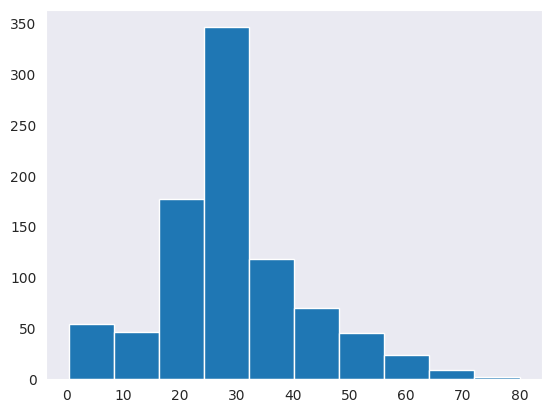

In [35]:
plt.hist(x='Age', data=df)

<Axes: xlabel='Pclass', ylabel='Survived'>

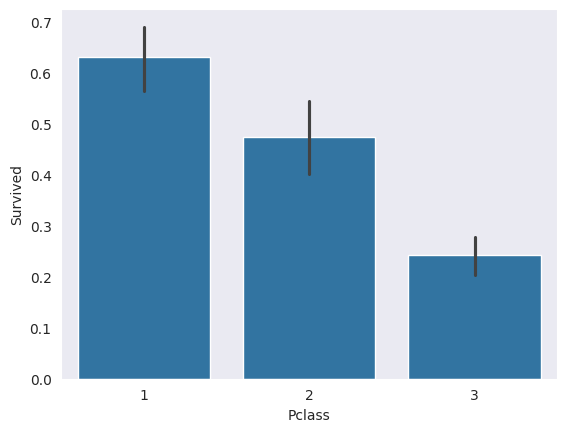

In [36]:
sns.barplot(x='Pclass', y='Survived', data=df)

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
X= df.drop(['Survived','Name','Ticket','Cabin','Sex'],axis=1)
X = pd.get_dummies(X, columns=['Embarked'], drop_first=True)
y= df['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report
rcf = RandomForestClassifier(n_estimators=200)
rcf.fit(X_train,y_train)
pred_rfc = rcf.predict(X_test)
print(classification_report(y_test,pred_rfc))
print(confusion_matrix(y_test,pred_rfc))

              precision    recall  f1-score   support

           0       0.73      0.79      0.76       105
           1       0.67      0.59      0.63        74

    accuracy                           0.71       179
   macro avg       0.70      0.69      0.70       179
weighted avg       0.71      0.71      0.71       179

[[83 22]
 [30 44]]


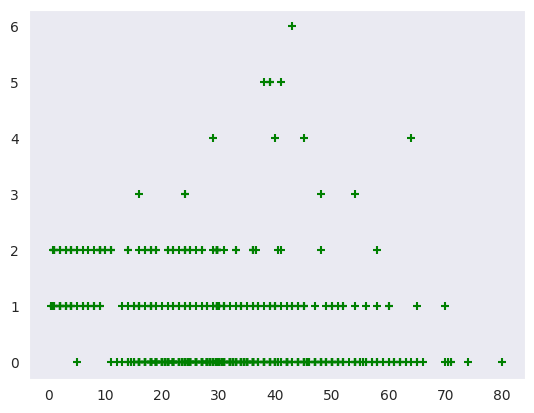

In [39]:
plt.scatter(df.Age, df.Parch , marker='+', color='green')

In [40]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
model.predict(X_test)

array([0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0])

In [41]:
model.score(X_test,y_test)

0.7206703910614525

In [42]:
model.predict_proba(X_train)

array([[0.50392403, 0.49607597],
       [0.55913098, 0.44086902],
       [0.80850055, 0.19149945],
       ...,
       [0.89844107, 0.10155893],
       [0.16901891, 0.83098109],
       [0.23178388, 0.76821612]])

In [43]:
def Lower_case(title):
  return title.lower().capitalize()
df['Name'].apply(Lower_case)

,Name
0,"Braund, mr. owen harris"
1,"Cumings, mrs. john bradley (florence briggs th..."
2,"Heikkinen, miss. laina"
3,"Futrelle, mrs. jacques heath (lily may peel)"
4,"Allen, mr. william henry"
...,...
886,"Montvila, rev. juozas"
887,"Graham, miss. margaret edith"
888,"Johnston, miss. catherine helen ""carrie"""
889,"Behr, mr. karl howell"


In [44]:
def add_year(text):
  return str(text)+'_2025'
d = df.applymap(add_year)
d.head()

/tmp/ipython-input-2961984182.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  d = df.applymap(add_year)


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0_2025,3_2025,"Braund, Mr. Owen Harris_2025",male_2025,22.0_2025,1_2025,0_2025,A/5 21171_2025,7.25_2025,B96 B98_2025,S_2025
1,1_2025,1_2025,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female_2025,38.0_2025,1_2025,0_2025,PC 17599_2025,71.2833_2025,C85_2025,C_2025
2,1_2025,3_2025,"Heikkinen, Miss. Laina_2025",female_2025,26.0_2025,0_2025,0_2025,STON/O2. 3101282_2025,7.925_2025,B96 B98_2025,S_2025
3,1_2025,1_2025,"Futrelle, Mrs. Jacques Heath (Lily May Peel)_2025",female_2025,35.0_2025,1_2025,0_2025,113803_2025,53.1_2025,C123_2025,S_2025
4,0_2025,3_2025,"Allen, Mr. William Henry_2025",male_2025,35.0_2025,0_2025,0_2025,373450_2025,8.05_2025,B96 B98_2025,S_2025


In [45]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [46]:
df['Sex'] = df['Sex'].map({'female':1, 'male':0})
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,S


In [47]:
df['Family_size']=df['SibSp']+df['Parch']+1
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family_size
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,2
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,B96 B98,S,1


In [48]:
def age_groups(a):
  if int(a)<18:
    return 'Children'
  elif int(a)>= 18 and int(a)<60:
    return 'Adult'
  else:
    return 'Senior'
df['Age'].apply(age_groups)

,Age
0,Adult
1,Adult
2,Adult
3,Adult
4,Adult
...,...
886,Adult
887,Adult
888,Adult
889,Adult


In [49]:
temporary = df['Fare'].apply(lambda x: x** 2)
temporary

,Fare
0,52.562500
1,5081.308859
2,62.805625
3,2819.610000
4,64.802500
...,...
886,169.000000
887,900.000000
888,549.902500
889,900.000000


In [50]:
from sklearn.preprocessing import MinMaxScaler
m = MinMaxScaler()
mn = m.fit_transform(df[['Age']], df[['Fare']])

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

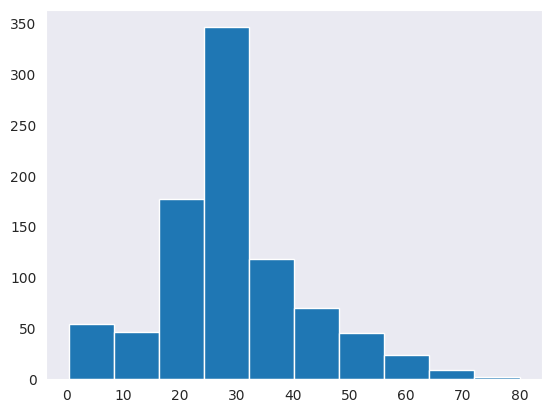

In [51]:
plt.hist(x='Age',data=df)

(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

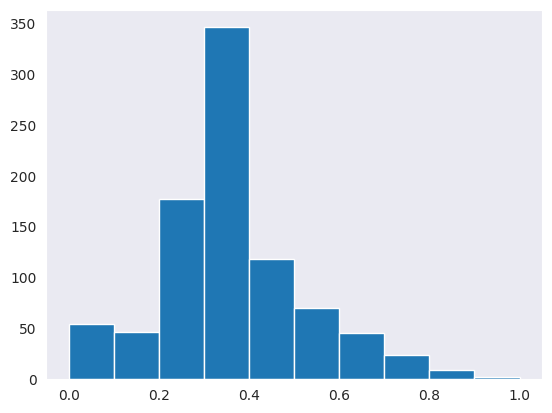

In [52]:
plt.hist(mn)